<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/labs/JPMC_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# John  Mohsbeck
# Day 3  Lab:  Exploratory Data Analysis on IBM Attrition dataset
# Import basic libraries
import numpy as np 
import pandas as pd 
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("\n Numpy: " + np.__version__)
print("\n sklearn: " + sklearn.__version__)

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late


 Numpy: 1.22.4

 sklearn: 1.2.1


In [38]:
# load a dataset from openML
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
import certifi
from sklearn.datasets import fetch_openml 
# Download the dataset from openml
dataset = fetch_openml(data_id=43696, as_frame=True)
#Extract feature matrix X and show 5 random samples
df = dataset["frame"]
pd.set_option("display.max_columns", None)
df.sample(5)




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1408,23,No,Travel_Rarely,571,Research Development,12,2,Other,1,1982,4,Male,78,3,1,Laboratory Technician,4,Single,2647,13672,1,Y,No,13,3,3,80,0,5,6,4,5,2,1,4
1040,40,No,Non-Travel,218,Research Development,8,1,Medical,1,1468,4,Male,55,2,3,Research Director,2,Divorced,13757,25178,2,Y,No,11,3,3,80,1,16,5,3,9,8,4,8
327,39,Yes,Travel_Rarely,1162,Sales,3,2,Medical,1,445,4,Female,41,3,2,Sales Executive,3,Married,5238,17778,4,Y,Yes,18,3,1,80,0,12,3,2,1,0,0,0
1057,29,Yes,Travel_Frequently,115,Sales,13,3,Technical Degree,1,1487,1,Female,51,3,2,Sales Executive,2,Single,5765,17485,5,Y,No,11,3,1,80,0,7,4,1,5,3,0,0
1091,33,No,Travel_Rarely,575,Research Development,25,3,Life Sciences,1,1545,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,Y,No,13,3,4,80,0,5,2,3,5,3,0,2


In [39]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

In [42]:
df.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,2,female,94,3,2,sales_executive,4,single,5993,19479,8,y,yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research__development,8,1,life_sciences,1,2,3,male,61,2,2,research_scientist,2,married,5130,24907,1,y,no,23,4,4,80,1,10,3,3,10,7,1,7
2,37,yes,travel_rarely,1373,research__development,2,2,other,1,4,4,male,92,2,1,laboratory_technician,3,single,2090,2396,6,y,yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,no,travel_frequently,1392,research__development,3,4,life_sciences,1,5,4,female,56,3,1,research_scientist,3,married,2909,23159,1,y,yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research__development,2,1,medical,1,7,1,male,40,3,1,laboratory_technician,2,married,3468,16632,9,y,no,12,3,4,80,1,6,3,3,2,2,2,2


In [43]:
# Pull descriptive statistics from your overall dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
dailyrate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
distancefromhome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
employeecount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
employeenumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
environmentsatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
hourlyrate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
jobinvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
joblevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [44]:
# Checking for Null Values 
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   object
 2   businesstravel            1470 non-null   object
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeecount             1470 non-null   int64 
 9   employeenumber            1470 non-null   int64 
 10  environmentsatisfaction   1470 non-null   int64 
 11  gender                    1470 non-null   object
 12  hourlyrate                1470 non-null   int64 
 13  jobinvolvement            1470 non-null   int64 
 14  joblevel                

In [46]:
# Preprocessing - go through all cat cols and validate against the data dictionary
print('attrition' + str(sorted(df['attrition'].unique())))

attrition['no', 'yes']


In [47]:
fill = (df.attrition == 'no')
df.loc[fill, 'attrition'] = 0
fill = (df.attrition == 'yes')
df.loc[fill, 'attrition'] = 1

In [48]:
print('businesstravel' + str(sorted(df['businesstravel'].unique())))

businesstravel['non-travel', 'travel_frequently', 'travel_rarely']


In [49]:
fill = (df.businesstravel == 'non-travel')
df.loc[fill, 'businesstravel'] = 0
fill = (df.businesstravel == 'travel_frequently')
df.loc[fill, 'businesstravel'] = 1
fill = (df.businesstravel == 'travel_rarely')
df.loc[fill, 'businesstravel'] = 2

In [50]:
print('department' + str(sorted(df['department'].unique())))

department['human_resources', 'research__development', 'sales']


In [51]:
fill = (df.department == 'human_resources')
df.loc[fill, 'department'] = 0
fill = (df.department == 'research__development')
df.loc[fill, 'department'] = 1
fill = (df.department == 'sales')
df.loc[fill, 'department'] = 2

In [52]:
print('educationfield' + str(sorted(df['educationfield'].unique())))

educationfield['human_resources', 'life_sciences', 'marketing', 'medical', 'other', 'technical_degree']


In [53]:
fill = (df.educationfield == 'human_resources')
df.loc[fill, 'educationfield'] = 0
fill = (df.educationfield == 'life_sciences')
df.loc[fill, 'educationfield'] = 1
fill = (df.educationfield == 'marketing')
df.loc[fill, 'educationfield'] = 2
fill = (df.educationfield == 'medical')
df.loc[fill, 'educationfield'] = 3
fill = (df.educationfield == 'other')
df.loc[fill, 'educationfield'] = 4
fill = (df.educationfield == 'technical_degree')
df.loc[fill, 'educationfield'] = 5


In [54]:
print('gender ' + str(sorted(df['gender'].unique())))

gender ['female', 'male']


In [55]:
fill = (df.gender == 'female')
df.loc[fill, 'gender'] = 0
fill = (df.gender == 'male')
df.loc[fill, 'gender'] = 1

In [56]:
print('jobrole' + str(sorted(df['jobrole'].unique())))

jobrole['healthcare_representative', 'human_resources', 'laboratory_technician', 'manager', 'manufacturing_director', 'research_director', 'research_scientist', 'sales_executive', 'sales_representative']


In [57]:
fill = (df.jobrole == 'healthcare_representative')
df.loc[fill, 'jobrole'] = 0
fill = (df.jobrole == 'human_resources')
df.loc[fill, 'jobrole'] = 1
fill = (df.jobrole == 'laboratory_technician')
df.loc[fill, 'jobrole'] = 2
fill = (df.jobrole == 'manager')
df.loc[fill, 'jobrole'] = 3
fill = (df.jobrole == 'manufacturing_director')
df.loc[fill, 'jobrole'] = 4
fill = (df.jobrole == 'research_director')
df.loc[fill, 'jobrole'] = 5
fill = (df.jobrole == 'research_scientist')
df.loc[fill, 'jobrole'] = 6
fill = (df.jobrole == 'sales_executive')
df.loc[fill, 'jobrole'] = 7
fill = (df.jobrole == 'sales_representative')
df.loc[fill, 'jobrole'] = 8


In [58]:
print('maritalstatus' + str(sorted(df['maritalstatus'].unique())))

maritalstatus['divorced', 'married', 'single']


In [59]:
fill = (df.maritalstatus == 'divorced')
df.loc[fill, 'maritalstatus'] = 0
fill = (df.maritalstatus == 'married')
df.loc[fill, 'maritalstatus'] = 1
fill = (df.maritalstatus == 'single')
df.loc[fill, 'maritalstatus'] = 2

In [60]:
print('over18' + str(sorted(df['over18'].unique())))

over18['y']


In [61]:
fill = (df.over18 == 'y')
df.loc[fill, 'over18'] = 0

In [62]:
print('overtime' + str(sorted(df['overtime'].unique())))

overtime['no', 'yes']


In [63]:
fill = (df.overtime == 'no')
df.loc[fill, 'overtime'] = 0
fill = (df.overtime == 'yes')
df.loc[fill, 'overtime'] = 1

In [64]:
# After encoding CAT columsn, convert all columns to numeric
df = df.apply(pd.to_numeric)

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
businesstravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
dailyrate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
distancefromhome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
educationfield,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
employeecount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
employeenumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


<AxesSubplot:xlabel='attrition', ylabel='count'>

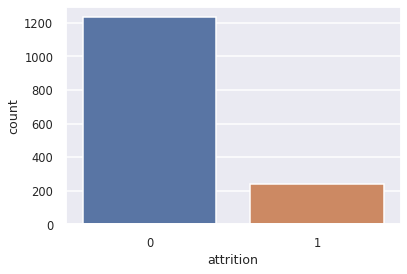

In [69]:
# Univariate Analysis - Analyze 1 variable at a time
# This analysis is restricted to cat cols ... 
# Think about this... when you did a "describe" - you were analyzing the numeric cols... one at a time
sns.countplot(x="attrition", data=df)

In [70]:
df['attrition'].value_counts()

0    1233
1     237
Name: attrition, dtype: int64

In [71]:
237 / (1233 + 237)

0.16122448979591836

In [72]:
df['attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: attrition, dtype: float64

<AxesSubplot:xlabel='jobrole', ylabel='count'>

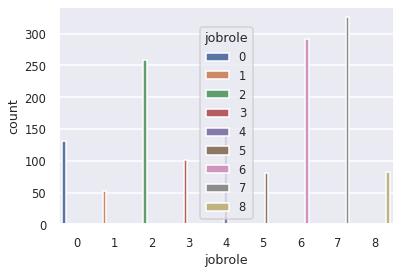

In [73]:
sns.countplot(x="jobrole", data=df, hue='jobrole')

In [74]:
df['department'].value_counts()

1    961
2    446
0     63
Name: department, dtype: int64

In [75]:
df['department'].value_counts(normalize=True)

1    0.653741
2    0.303401
0    0.042857
Name: department, dtype: float64

<AxesSubplot:xlabel='department', ylabel='count'>

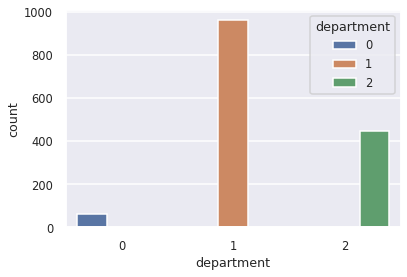

In [76]:
sns.countplot(x="department", data=df, hue='department')

In [77]:
df['educationfield'].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: educationfield, dtype: int64

In [78]:
df['educationfield'].value_counts(normalize=True)

1    0.412245
3    0.315646
2    0.108163
5    0.089796
4    0.055782
0    0.018367
Name: educationfield, dtype: float64

<AxesSubplot:xlabel='educationfield', ylabel='count'>

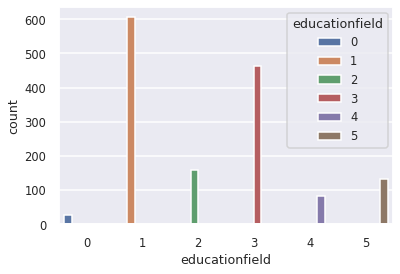

In [79]:
sns.countplot(x="educationfield", data=df, hue='educationfield')

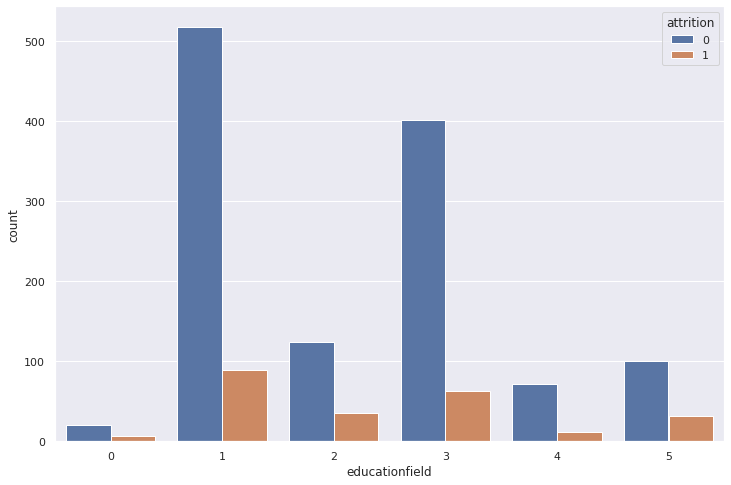

In [80]:
# Bivariate Analysis
sns.set(rc={'figure.figsize':(12,8)})
edu = sns.countplot(x='educationfield', hue='attrition', data=df)
plt.show()

In [81]:
pd.crosstab(df.educationfield,df.attrition,margins=True)

attrition,0,1,All
educationfield,,,
0,20,7,27
1,517,89,606
2,124,35,159
3,401,63,464
4,71,11,82
5,100,32,132
All,1233,237,1470


In [82]:
pd.crosstab(df.educationfield,df.attrition,normalize='index',margins=True)

attrition,0,1
educationfield,,
0,0.740741,0.259259
1,0.853135,0.146865
2,0.779874,0.220126
3,0.864224,0.135776
4,0.865854,0.134146
5,0.757576,0.242424
All,0.838776,0.161224


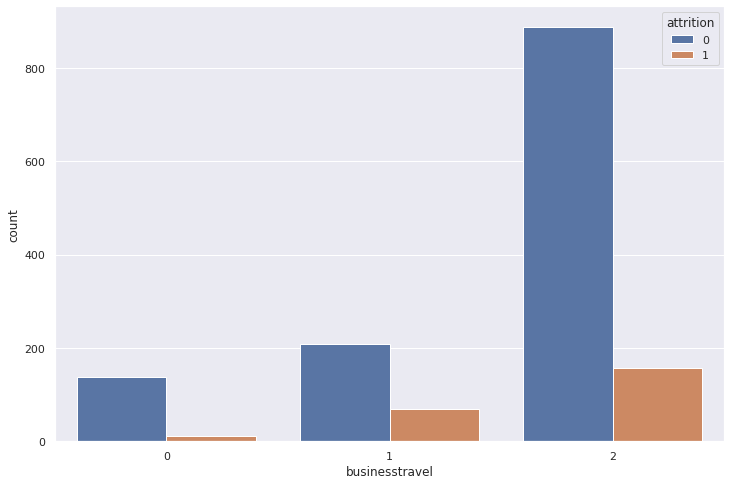

In [83]:
sns.set(rc={'figure.figsize':(12,8)})
bustravel= sns.countplot(x="businesstravel", hue='attrition', data=df)
plt.show()

In [84]:
pd.crosstab(df.monthlyincome,df.attrition,margins=True)

attrition,0,1,All
monthlyincome,,,
1009,0,1,1
1051,1,0,1
1052,1,0,1
1081,0,1,1
1091,0,1,1
...,...,...,...
19926,1,0,1
19943,1,0,1
19973,1,0,1


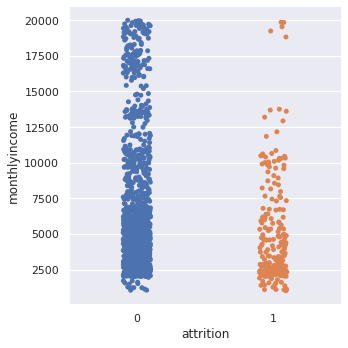

In [85]:
sns.catplot(x="attrition", y="monthlyincome", jitter=True, data=df);

In [86]:
pd.crosstab(df.age,df.attrition)

attrition,0,1
age,,
18,4,4
19,3,6
20,5,6
21,7,6
22,11,5
23,10,4
24,19,7
25,20,6
26,27,12


In [87]:
pd.crosstab(df.age,df.attrition,normalize='index',margins=True)

attrition,0,1
age,,
18,0.500000,0.500000
19,0.333333,0.666667
20,0.454545,0.545455
21,0.538462,0.461538
22,0.687500,0.312500
23,0.714286,0.285714
24,0.730769,0.269231
25,0.769231,0.230769
26,0.692308,0.307692


In [88]:
# Correlation
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

<AxesSubplot:>

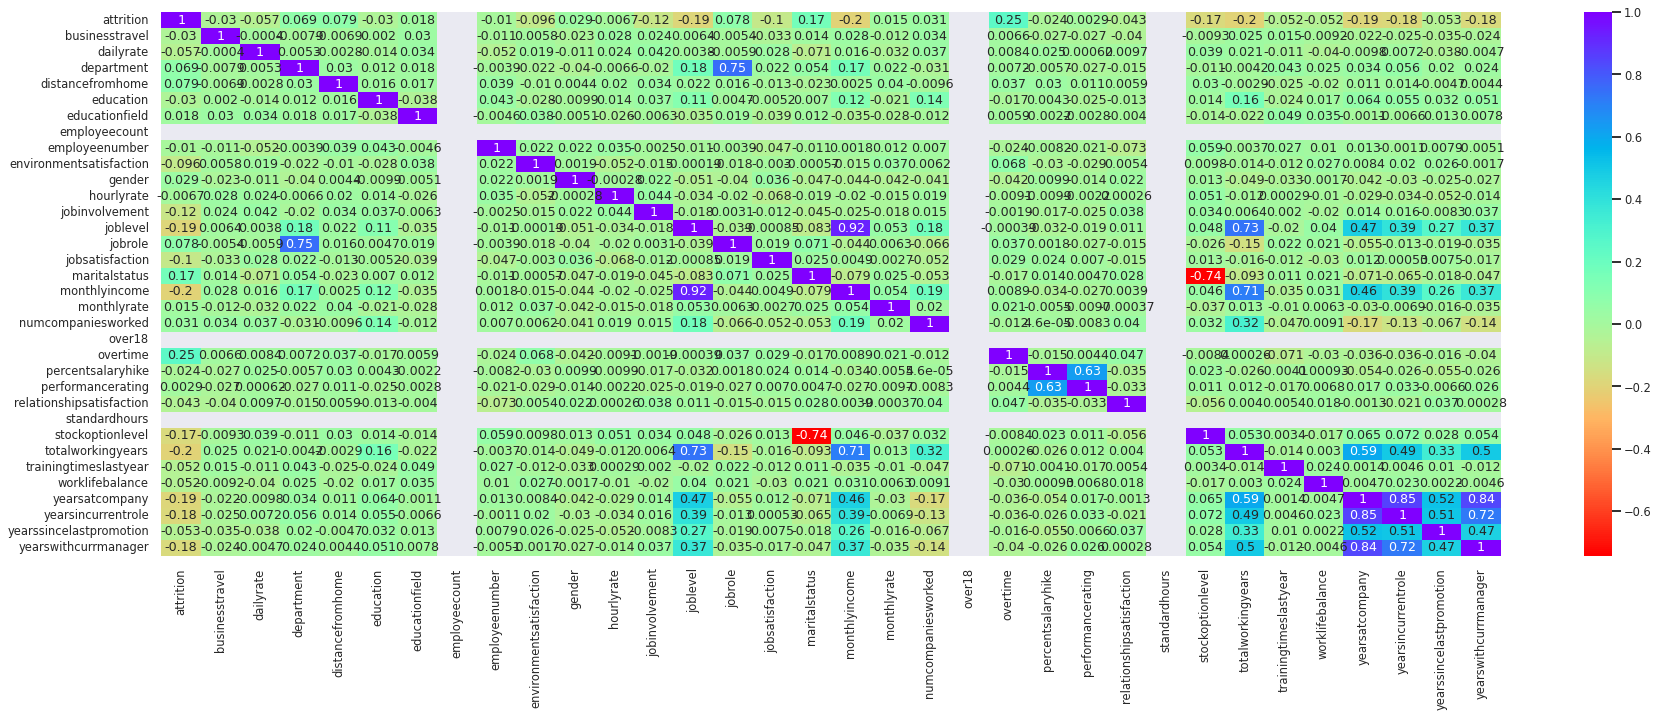

In [89]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [90]:
df.drop("attrition", axis=1).apply(lambda x: x.corr(df.attrition,method='spearman')).sort_values(ascending=False)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


overtime                    0.246118
maritalstatus               0.165126
distancefromhome            0.079248
jobrole                     0.078008
department                  0.069104
numcompaniesworked          0.030505
gender                      0.029453
educationfield              0.018022
monthlyrate                 0.015258
performancerating           0.002889
hourlyrate                 -0.006692
employeenumber             -0.010369
percentsalaryhike          -0.023612
businesstravel             -0.029663
education                  -0.030346
relationshipsatisfaction   -0.042664
trainingtimeslastyear      -0.051757
worklifebalance            -0.051951
yearssincelastpromotion    -0.053273
dailyrate                  -0.056970
environmentsatisfaction    -0.096486
jobsatisfaction            -0.102948
jobinvolvement             -0.119496
age                        -0.171214
stockoptionlevel           -0.172296
yearswithcurrmanager       -0.175355
yearsincurrentrole         -0.180623
j

In [34]:
!pip install pandas-profiling==3.2.0
!pip install markupsafe==2.0.1
# https://pypi.org/project/pandas-profiling/3.1.0/#history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 KB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 25.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=db6a09cfae8066d608b4cd494d2b325a0825f16413154d96865ea346305e9aec
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [91]:
import pandas as pd
from pandas_profiling import ProfileReport

In [92]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ImportError: ignored